In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split # holdout
from sklearn.inspection import permutation_importance
from sklearn.metrics import matthews_corrcoef, make_scorer
import pycaret
from pycaret.classification import *

In [2]:
DATA = Path("../../data")

In [3]:
train_data = pd.read_csv(DATA / "train_outlier_preprocessing.csv")
test_data = pd.read_csv(DATA / "test_outlier_preprocessing.csv")

In [4]:
train_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,NaN,NaN,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,NaN,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,NaN,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,NaN,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,NaN,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,NaN,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,NaN,NaN,n,t,NaN,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [5]:
del train_data["id"]

In [6]:
test_data

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,NaN,NaN,d,a
1,3116946,6.90,NaN,NaN,NaN,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,NaN,n,f,NaN,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,NaN,y,f,NaN,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,NaN,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [7]:
del test_data["id"]

In [8]:
print(f"Train Shape : {train_data.shape}")
print(f"Test Shape : {test_data.shape}")

Train Shape : (3116945, 21)
Test Shape : (2077964, 20)


In [9]:
feature = train_data.iloc[:, 1:]
target = train_data.iloc[:, 0]

In [10]:
train_X, valid_X, train_y, valid_y = train_test_split(feature, target, test_size=0.1, shuffle=True, stratify=target, random_state=42) # Holdout

In [11]:
print(f"Train_X Shape : {train_X.shape}")
print(f"Valid_X Shape : {valid_X.shape}")
print(f"Train_y Shape : {train_y.shape}")
print(f"Valid_y Shape : {valid_y.shape}")

Train_X Shape : (2805250, 20)
Valid_X Shape : (311695, 20)
Train_y Shape : (2805250,)
Valid_y Shape : (311695,)


In [12]:
categorical_features = list(feature.select_dtypes(include=["object"]).columns)
numeric_features = list(feature.select_dtypes(include=["float"]).columns)

In [13]:
exp_clf = setup(data=train_data, 
                target='class', 
                categorical_features=categorical_features,
                numeric_features=numeric_features,
                session_id=42)

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Target mapping,"e: 0, p: 1"
4,Original data shape,"(3116945, 21)"
5,Transformed data shape,"(3116945, 95)"
6,Transformed train set shape,"(2181861, 95)"
7,Transformed test set shape,"(935084, 95)"
8,Numeric features,3
9,Categorical features,17


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
models = compare_models(include=["lightgbm", "xgboost", "catboost"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9879,0.9963,0.9879,0.9879,0.9879,0.9755,0.9756,136.6860
xgboost,Extreme Gradient Boosting,0.9853,0.9956,0.9853,0.9853,0.9853,0.9704,0.9704,50.6230
lightgbm,Light Gradient Boosting Machine,0.9804,0.9948,0.9804,0.9804,0.9804,0.9605,0.9605,43.8550


In [16]:
cb_model = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9879,0.9964,0.9879,0.9879,0.9879,0.9756,0.9756
1,0.9875,0.9962,0.9875,0.9875,0.9875,0.9748,0.9748
2,0.9875,0.9960,0.9875,0.9875,0.9875,0.9749,0.9749
3,0.9878,0.9961,0.9878,0.9878,0.9878,0.9754,0.9754
4,0.9878,0.9964,0.9878,0.9879,0.9879,0.9755,0.9755
5,0.9884,0.9964,0.9884,0.9884,0.9884,0.9766,0.9766
6,0.9876,0.9963,0.9876,0.9877,0.9877,0.9751,0.9751
7,0.9881,0.9964,0.9881,0.9881,0.9881,0.9759,0.9759
8,0.9882,0.9963,0.9882,0.9882,0.9882,0.9761,0.9761


In [17]:
tuened_cb = tune_model(cb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9735,0.9936,0.9735,0.9736,0.9735,0.9466,0.9466
1,0.9739,0.9935,0.9739,0.9740,0.9739,0.9473,0.9474
2,0.9735,0.9932,0.9735,0.9736,0.9735,0.9466,0.9466
3,0.9743,0.9934,0.9743,0.9744,0.9743,0.9482,0.9483
4,0.9738,0.9934,0.9738,0.9738,0.9738,0.9471,0.9471
5,0.9742,0.9936,0.9742,0.9743,0.9743,0.9481,0.9481
6,0.9740,0.9933,0.9740,0.9741,0.9740,0.9476,0.9476
7,0.9736,0.9934,0.9736,0.9737,0.9736,0.9469,0.9469
8,0.9726,0.9932,0.9726,0.9727,0.9726,0.9447,0.9448


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
feature_importance = {}
feature_importance = feature_importance.fromkeys(train_data.columns[1:])
for i, key in enumerate(feature_importance.keys()):
    feature_importance[key] = tuened_cb.feature_importances_[i]

In [31]:
feature_importance = sorted(feature_importance.items(), key=lambda x: -x[1])
feature_importance = dict(feature_importance)

<Axes: >

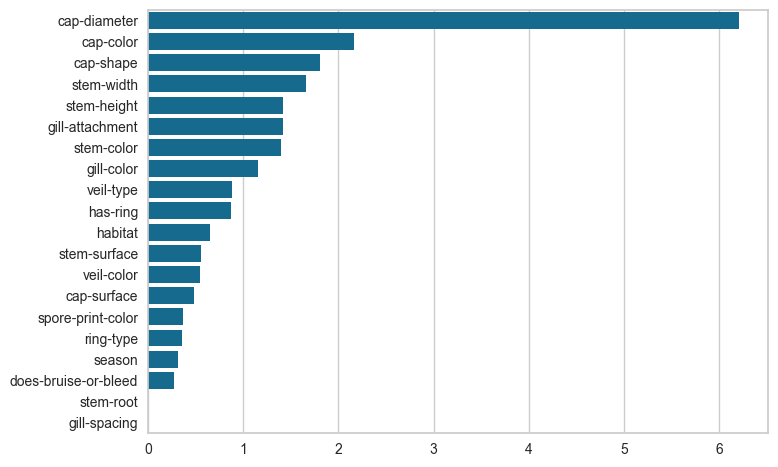

In [32]:
sns.barplot(x=feature_importance.values(), y=feature_importance.keys())

In [19]:
val_pred = predict_model(tuened_cb, data=valid_X)

In [22]:
matthews_corrcoef(valid_y, val_pred["prediction_label"])

0.9761476063575685

In [23]:
test_pred = predict_model(tuened_cb, data=test_data)

In [24]:
test_pred

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,prediction_label,prediction_score
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.120001,...,w,u,w,t,NaN,NaN,d,a,e,0.9925
1,6.90,NaN,NaN,NaN,f,NaN,c,y,1.27,10.750000,...,n,NaN,NaN,f,f,NaN,d,a,p,0.9390
2,2.00,b,g,n,f,NaN,c,n,6.18,3.140000,...,n,NaN,NaN,f,f,NaN,d,s,p,0.9843
3,3.47,x,NaN,n,f,NaN,c,n,4.98,8.510000,...,w,NaN,n,t,z,NaN,d,u,p,0.9961
4,6.17,x,NaN,y,f,NaN,NaN,y,6.73,13.700000,...,y,NaN,y,t,NaN,NaN,d,u,e,0.9976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,x,g,w,f,a,d,w,2.67,1.350000,...,e,NaN,NaN,f,f,NaN,d,u,p,0.9983
2077960,3.12,x,s,w,f,d,c,w,2.69,7.380000,...,w,NaN,NaN,f,f,NaN,g,a,p,0.9907
2077961,5.73,x,NaN,e,f,a,NaN,w,6.16,9.740000,...,y,NaN,w,t,z,NaN,d,a,p,0.9970
2077962,5.03,b,g,n,f,a,d,g,6.00,3.460000,...,g,NaN,NaN,f,f,NaN,d,a,e,0.9985


In [25]:
submission = pd.read_csv(DATA / "sample_submission.csv")

In [27]:
submission["class"] = test_pred["prediction_label"]

In [29]:
submission.to_csv(DATA / "exp1.csv", index=False)